In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns

In [3]:
user = "aabounak"
password = "mysecretpassword"
host = "localhost"
port = "5432"
database = "piscineds"

def connect_to_postgres():
  return create_engine(
    url=f"postgresql://{user}:{password}@{host}:{port}/{database}"
  )

In [4]:
engine = connect_to_postgres()

In [62]:
with engine.connect() as connection:
  result = connection.execute(text('select * from customers limit 100000'))
  data = result.fetchall()

columns_names = result.keys()
df = pd.DataFrame(data, columns=columns_names)
df.head()

,event_time,event_type,product_id,price,user_id,user_session,category_id,category_code,brand
0,2022-11-24 09:19:35+00:00,remove_from_cart,5834156,6.19,471197852,2c9b5705-8f03-42a2-94db-4d065e51496d,NaN,None,None
1,2022-11-24 09:19:35+00:00,view,5785449,3.76,538130829,f727b153-4166-4abb-a6d4-2712c5f32930,1.658462e+18,None,None
2,2022-11-24 09:19:35+00:00,view,5906528,5.56,575796783,60700628-3116-47ad-a58e-df4878253867,1.487580e+18,None,None
3,2022-11-24 09:19:36+00:00,cart,5677619,0.83,565745379,004e7e9a-4769-4f7a-be9b-ce0168b9a581,NaN,None,None
4,2022-11-24 09:19:39+00:00,view,5759491,1.73,573094118,923c286b-3584-4745-92dd-2e15d883f8d7,1.487580e+18,None,None


### Exercise 00

<Axes: ylabel='count'>

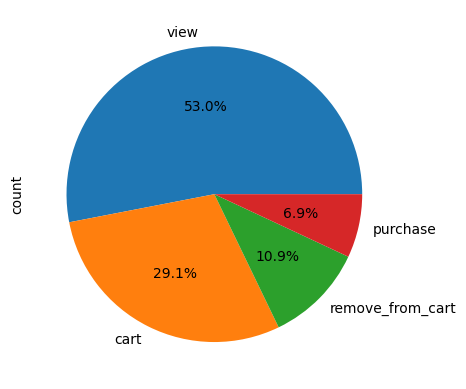

In [55]:
df['event_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Exercise 01

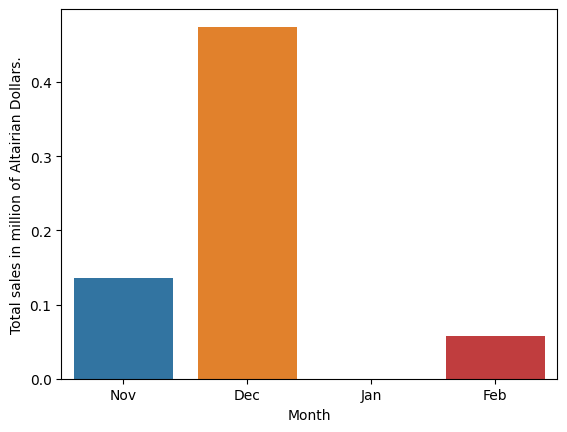

In [56]:
df['event_time'] = pd.to_datetime(df['event_time'])
filtered_data = df[(df['event_type'] == 'purchase')]

agg_data = filtered_data.resample('M', on='event_time').agg({
    'event_type': 'count',
    'price': 'sum'
}).reset_index()

agg_data['event_time'] = agg_data['event_time'].dt.strftime('%b')

sns.barplot(data=agg_data, x='event_time', y='price')

def formatter(x, pos):
    return f'{x / 1000000}'

y_formatter = mtick.FuncFormatter(formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.xlabel('Month')
plt.ylabel('Total sales in million of Altairian Dollars.')
plt.show()

In [63]:

print(filtered_data.head(10))
sns.lineplot(data=filtered_data, x='event_time', y='price')


                   event_time event_type  product_id  price    user_id  \
85  2023-02-27 08:17:26+00:00   purchase     5775980  11.90  571008803   
86  2023-02-27 08:17:26+00:00   purchase     5844397   2.38  571008803   
87  2023-02-27 08:17:26+00:00   purchase     5868876   9.21  571008803   
260 2023-02-27 08:20:38+00:00   purchase     5842162   1.59  569056030   
261 2023-02-27 08:20:38+00:00   purchase     5844301   1.57  569056030   
262 2023-02-27 08:20:38+00:00   purchase     5844302   1.57  569056030   
316 2023-02-27 08:21:27+00:00   purchase     5841799   0.13  617713222   
317 2023-02-27 08:21:27+00:00   purchase     5842112   0.79  617713222   
318 2023-02-27 08:21:27+00:00   purchase     5845399   1.98  617713222   
319 2023-02-27 08:21:27+00:00   purchase     5849552  10.95  617713222   

                             user_session   category_id category_code brand  
85   69d119bf-ca7f-445f-bc81-67d89bd89b49  1.783999e+18          None  None  
86   69d119bf-ca7f-445f-bc81-